## Project Report

# Can age and played hours predict whether a player is subscribed or not in players data ##

OUR NAMES

## Introduction

A research group has set up a MineCraft server to collect data on how people play video games. Players' actions are recorded as they navigate through the world. The data includes players data as well as sessions data. In this report we aim to analyze the question: Can age and played hours predict whether a player is subscribed or not in players data?   

In the players data, there are 196 observations and 7 variables. The 7 variables are:

- **experience**: (how experienced the player is, type chr)
- **subscribe**: (if they are subscribed,type lgl)
- **hashedEmail**: (player's emails, type chr)
- **played_hours**: (number of hours the player played, type dbl)
- **name**: (player's name, type chr)
- **gender**: (gender of the player, type chr)
- **Age**: (age of the player, type dbl)

## Methods & Results

#### Loading Libraries
We begin by loading all the necessary libraries for our exploration into our notebook. 

In [ ]:
library(tidyverse)
library(tidymodels)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Reading and Cleaning Data
Next, we will read the `players.csv` data from a public git repository. We then clean the data by mutating `experience`, `gender`, and `subscribe` into type `fct` and removing any rows with NA values. 

In [ ]:
# set the seed
set.seed(1)

players_url<-"https://raw.githubusercontent.com/wenqin07/toy_ds_project/7ab5fe995d0e438443ebe9e80bd91a2363680d8f/players.csv"
players_data<-read_csv(players_url)

players_data_tidy<-players_data|>
    mutate(experience = as.factor(experience))|>
    mutate(gender = as.factor(gender)) |>
    mutate(subscribe = as.factor(subscribe))|>
    na.omit()


head(players_data_tidy)
tail(players_data_tidy)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0.0,Orion,Male,17
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


*figure 1* : tidy players.csv data

## Summarizing and Visualizing data
Next, we will summarize the cleaned `players` data by calculating the mean value for the relevant variables, `played_hours` and `Age`. 

In [ ]:
players_mean<-players_data_tidy|>
    select(played_hours,Age)|>
    summarize(
          mean_played_hours = mean(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


*figure 2* : summary statistic for played_hours and Age

We will also visualize the relationships of `played_hours` and `Age` in relation to `subscribe` through various plots.

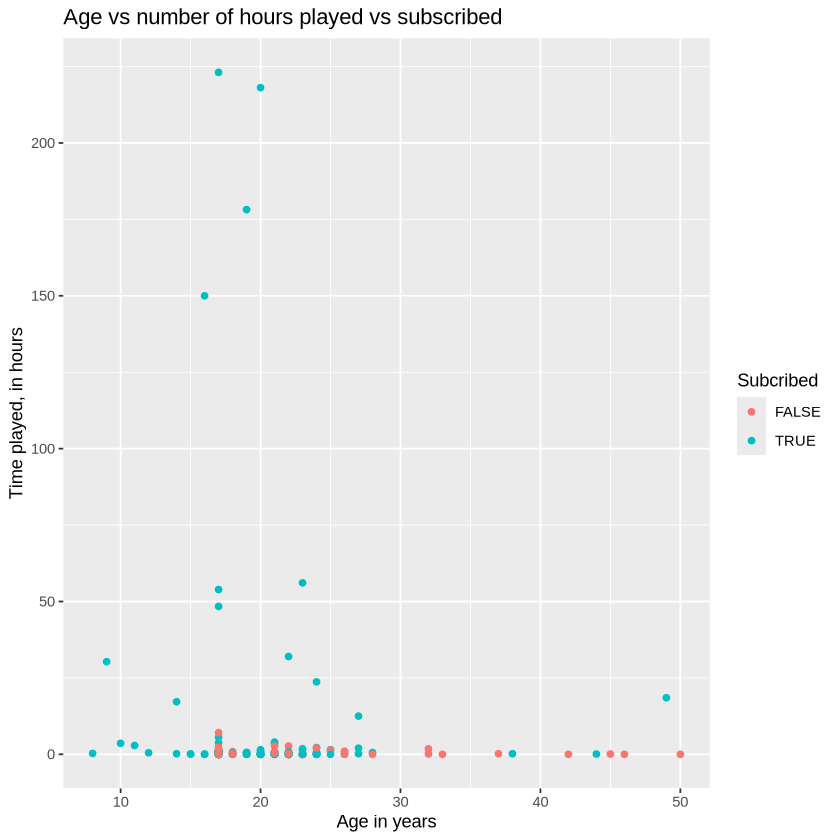

In [ ]:
explore1<-players_data_tidy|>
    ggplot(aes(x=Age,y=played_hours,color=subscribe))+
    geom_point() +
    labs(x = "Age in years",
       y = "Time played, in hours",
       color = "Subcribed",
        title= "Age vs number of hours played vs subscribed") 
explore1

*figure 3* : scatterplot of Age vs played hours

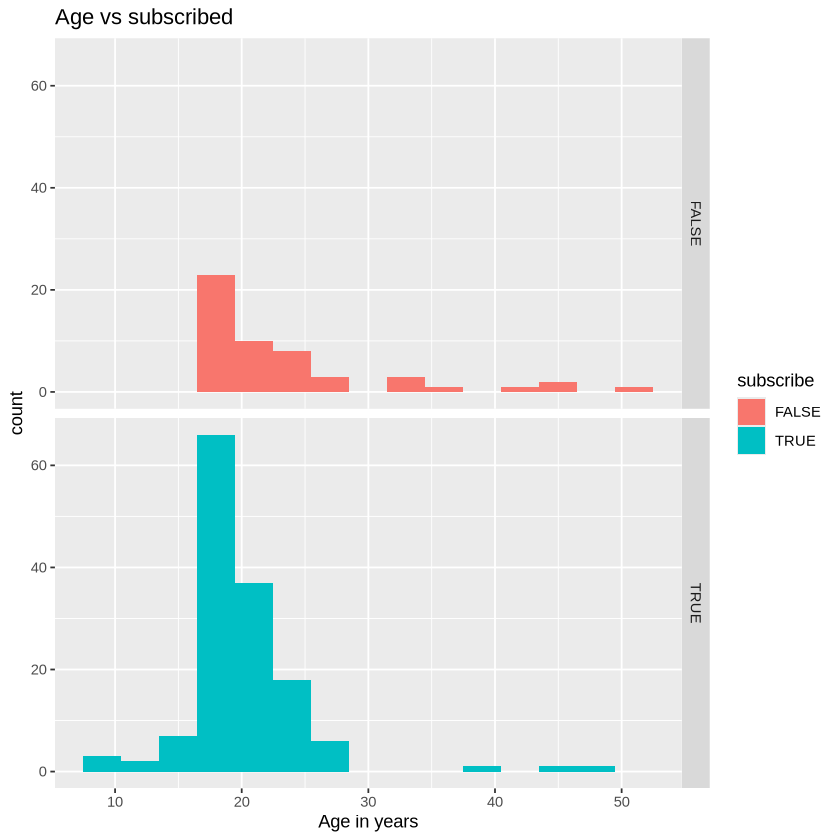

In [ ]:
explore2<-players_data_tidy|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram(bins= 15, position = "identity") +
  facet_grid(rows = vars(subscribe)) +
    labs(x = "Age in years",
        title= "Age vs subscribed") 
explore2

*figure 4* : histogram of Age and subscription status

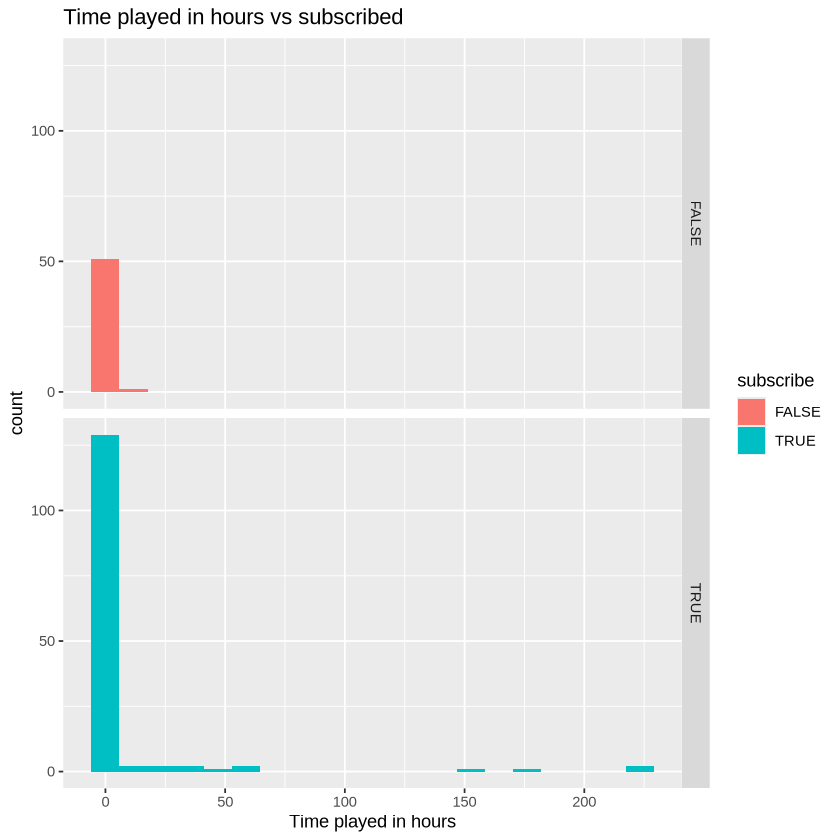

In [ ]:
explore3<-players_data_tidy|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram(bins = 20, position = "identity") +
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Time played in hours",
        title= "Time played in hours vs subscribed") 
explore3

*figure 5* : histogram of played hours and subscription status

From the tibble, we can see that the mean played time was 5.845918 hours and the mean age was 20.52062 from the players dataset. From the exploratory graphs, there are more people who are subscribed than not subscribed. In those who are 30 and under, there are more people subscribed while those 30+ have more unsubscribed people. People who play more hours tend to be subscribed, as the ones who play 25+ hours are all subscribed.

## Splitting data into training and testing set
Before beginning our predictions, we need to split our data into a training set and a testing set. We decided to use `initial_split` to shuffle and split our data into 75% training and 25% testing to avoid any biases.

In [ ]:
#setting the seed
set.seed(1)
# Creating training and testing data 
players_split <- initial_split(players_data_tidy, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

nrow(players_train)
nrow(players_test)

[1] 145

[1] 49

we can see that our training set has 145 rows, and our testing set has 49 rows. Since this this dataset (`players.csv`) is a smaller data set, the size of the splits is enough for us to train and test our model with.

## TO DO: Visualization of training set

## Determining the best K value
Now that we split our data, we need to find the best K value to be used in our classification model. We will perform this stage in these steps: 
- begin by setting our seed to ensure reproducibility. 
- create a recipe for our model that uses `players_train` to predict `subscribe` using `Age` and `played_hours` as the predictors, and scaling the predictors to ensure that all variables are weighted equally. We will also upscale subscribe to ensure that subscribe can be predicted on a more balanced scale because based on our visualizations of `players_data_tidy` we can see that there is way more `TRUE` values than `FALSE` in subscribe.
- create a spec for our model by using `rectangular` as the weight function and `tune()` for neighbors to prepare for cross-validation.
- create `k_vals` for a range of K values to be tested. We will use values ranging from 1-12, as our data is a small data set.
- create a 5-fold cross-validation because 5-fold and 10-fold do not differ much in standard deviation for our project, so using 5-fold would be more efficient.
- fit our model into a workflow by using the recipe and spec created, replacing `fit_resampling` with `tune_grid`.


In [ ]:
#setting the seed
set.seed(1)
# Creating players recipe
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


# Creating spec 
players_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 12, by = 1))

# Creating 5 fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# fit the knn model
players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals)|>
  collect_metrics()

# Lists all accuracies of K values from 1 to 100 
accuracies <- players_fit |>
  filter(.metric == "accuracy")

# selects best K value and accuracy
best_k_values <- accuracies |>
        arrange(desc(mean)) |>
        head(6) |>
        select(neighbors, mean)
best_k_values


neighbors,mean
<dbl>,<dbl>
9,0.6076355
11,0.6076355
7,0.6004926
8,0.6004926
12,0.5943021
10,0.5938424


*figure_* : top 6 best K values

Since these K values are fairly close in accuracy, we can plot a accuracy vs K graph to visualize the best neighbour

accuracy vs K graph

In [ ]:
best_k_values_plot <- accuracies |>
    gplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs (title = "Accuracy vs. K"),
        x = "Number of Neighbors (K)",
        y = "Accuracy")


## Final model 

Now that we have determined the best K value, we can begin to build our final model. We will complete this stage in the following stages: 
- start by creating a new spec with the best K value, in this case K=9.
- create a new workflow with the updated spec

In [ ]:
set.seed(1)

players_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

players_fit <- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec_final)|>
    fit(data = players_train)

## Testing the model 

Now that we have created the final model we can test our model by running it against our `players_test`.

In [ ]:
set.seed(1)

#predict
players_predictions <- players_fit |>
    predict(players_test)|>
    bind_cols(players_test)

#find the accuracy of the predictions
players_metrics<- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") 
players_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


*figure* : accuraccy table for model

In [ ]:
#confusion matrix, identifies the areas the model is weak at classifying
confusion_matrix <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

          Truth
Prediction FALSE TRUE
     FALSE     5    5
     TRUE      8   31

*figure* : confusion matrix for subscribe

Our model resulted in a 73.5% accuracy, with 36 out of 49 predictions being correct. The model struggles a bit in predicting FALSE subscriptions likely due to there being less FALSE cases in our data compared to TRUE. However, this does not affect the purpose of our model too greatly, becuase we would rather categorize a player to be subscribed to our newsletter so we can advertise up comming events rather than potentionally missing out on a player when we send out newsletters.